In [29]:
from xmitgcm import open_mdsdataset
from plotters import LLC_plotter

# --- Add some libraries for plotting 
import holoviews as hv
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs
hv.notebook_extension()

# Set as appropriate; I've saved only the grid data files in a dedicated
# directory.
data_dir = '/Users/tim/work/results/eccov4r2'
grid_dir = '/Users/tim/work/grids/llc90'
ds = open_mdsdataset(grid_dir=grid_dir, data_dir=data_dir, delta_t=3600, geometry='llc')

# Make a plotter with the dataset as the parent. Note that if you modify the data set
# stored in `ds`, changes *are* stored in the plotter's `parent` variable. However, if
# you rebind `ds`, the plotter still sees the last state of the data set.
plotter = LLC_plotter(ds)

# Have a look at the data set that the plotter stores internally:
plotter.ds

/Users/tim/anaconda3/lib/python3.6/site-packages/xmitgcm-0.2.1-py3.6.egg/xmitgcm/mds_store.py:696: UserWarning: Couldn't find available_diagnostics.log in /Users/tim/work/results/eccov4r2. Using default version.
  "in %s. Using default version." % data_dir)
/Users/tim/anaconda3/lib/python3.6/site-packages/xmitgcm-0.2.1-py3.6.egg/xmitgcm/utils.py:314: UserWarning: Not sure what to do with rlev = L
  warnings.warn("Not sure what to do with rlev = " + rlev)


<xarray.Dataset>
Dimensions:  (i: 90, i_g: 90, j: 1170, j_g: 1170)
Coordinates:
  * j        (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * i        (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * j_g      (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i_g      (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
    XC       (j, i) float64 -111.6 -111.3 -110.9 -110.5 -110.0 -109.3 -108.4 ...
    XG       (j_g, i_g) float64 -115.0 -115.0 -115.0 -115.0 -115.0 -115.0 ...
    YC       (j, i) float64 -88.24 -88.38 -88.52 -88.66 -88.8 -88.94 -89.08 ...
    YG       (j_g, i_g) float64 -88.18 -88.32 -88.46 -88.6 -88.74 -88.88 ...
Data variables:
    *empty*

In [30]:
# Now compute some data variable that we want to plot, and
# store it in the data set.
ds['THETA_vol_avg'] = (ds.THETA * ds.rA * ds.drF).sum(dim='k')
plotter.set_data_variable('THETA_vol_avg')

# And now the internal data set looks like:
plotter.ds

<xarray.Dataset>
Dimensions:      (i: 90, i_g: 90, j: 1170, j_g: 1170, time: 6)
Coordinates:
  * j            (j) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * i            (i) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 ...
  * j_g          (j_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
  * i_g          (i_g) int64 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 ...
    XC           (j, i) float64 -111.6 -111.3 -110.9 -110.5 -110.0 -109.3 ...
    XG           (j_g, i_g) float64 -115.0 -115.0 -115.0 -115.0 -115.0 ...
    YC           (j, i) float64 -88.24 -88.38 -88.52 -88.66 -88.8 -88.94 ...
    YG           (j_g, i_g) float64 -88.18 -88.32 -88.46 -88.6 -88.74 -88.88 ...
  * time         (time) int64 2635200 5140800 7819200 10411200 13089600 15681600
Data variables:
    var_to_plot  (time, j, i) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

Actual plotting coming soon; I haven't got GeoViews examples to work.

In [31]:
# Wrap it into a GeoViews Dataset
kdims = ['time','i','j']
vdims = ['var_to_plot']

gv_ds = gv.Dataset(plotter.ds,kdims=kdims,vdims=vdims,crs=crs.PlateCarree())
print(repr(gv_ds))
print(gv_ds['time'])

:Dataset   [time,i,j]   (var_to_plot)
[ 2635200  2635200  2635200 ..., 15681600 15681600 15681600]


:Image   [j,i]   (var_to_plot)
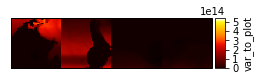

In [32]:
%opts Image {+framewise} [colorbar=True]
%output widgets='live'

gv_ds.to(gv.Image,['j','i']).select(time=2635200)